In [1]:
# Set up matplotlib
%matplotlib inline

In [37]:
# Import our package
import sys, importlib

sys.path.append("/home/ubuntu/cell_counting")

from src import dataset
from src import visualization
importlib.reload(dataset)
importlib.reload(visualization)

<module 'src.visualization' from '/home/ubuntu/cell_counting/src/visualization.py'>

In [38]:
# Load the dataset

METADATA_PATH = "/home/ubuntu/cell_counting/data/microbia_segments/raw/enumeration_segments.json"
RAW_DATA_PATH = "/home/ubuntu/cell_counting/data/microbia_segments/raw/"
SHAPE = (100, 100)

def image_path_getter(example_metadata):
    return RAW_DATA_PATH + example_metadata["Segment Relative Path"]

def mask_path_getter(example_metadata):
    return RAW_DATA_PATH + example_metadata["Binary Segment Relative Path"]

def label_getter(example_metadata):
    return example_metadata["data"]["segment_type"]["data"]

microbia_segments = dataset.Dataset()
microbia_segments.load_images_masks_labels_from_json(METADATA_PATH, image_path_getter, mask_path_getter, label_getter, SHAPE)

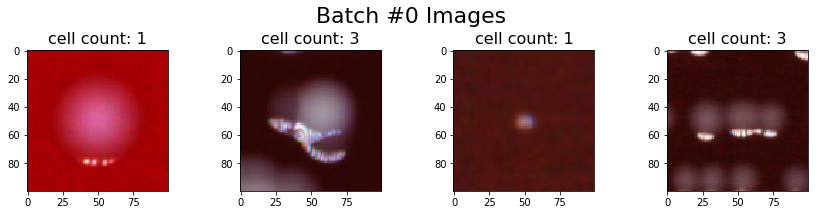

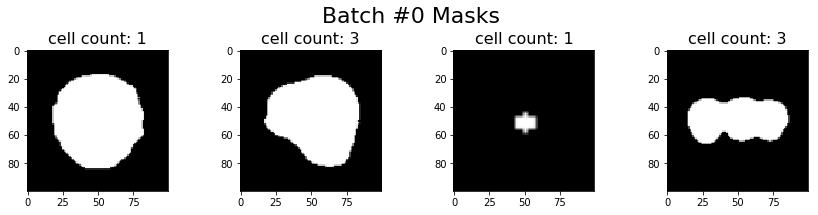

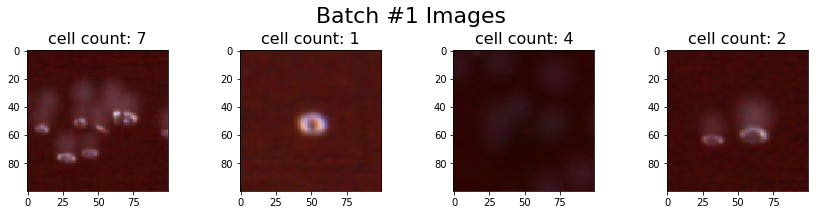

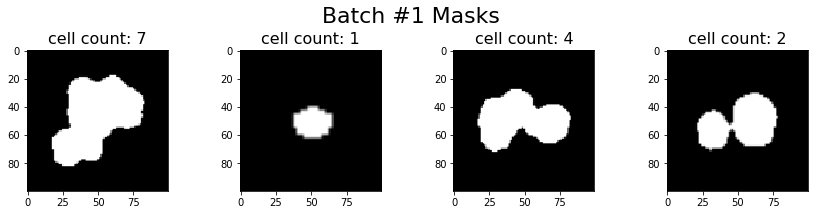

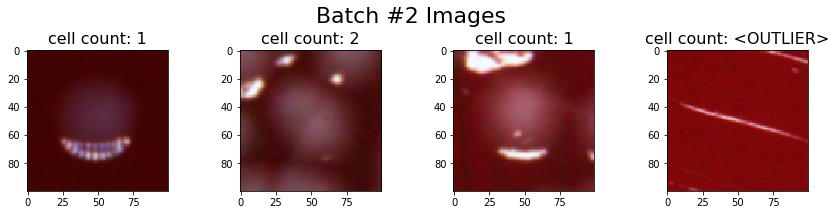

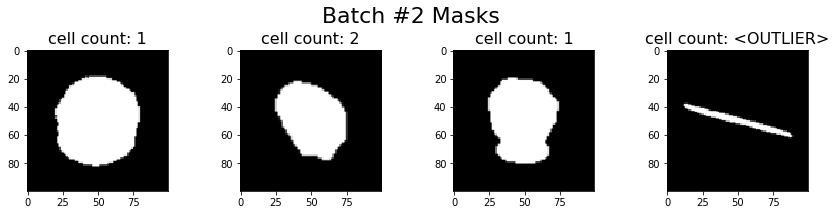

In [42]:
# Plot a few batches
BATCH_SIZE = 4
BATCHES = 3

for batch in range(BATCHES):
    inputs, outputs = microbia_segments.get_batch(BATCH_SIZE)
    visualization.show_image_grid(inputs[...,:3], 1, BATCH_SIZE, 3, 12, "Batch #{0} Images".format(batch),
                                  ["cell count: {0}".format(count + 1 if count != 7 else "<OUTLIER>") for count in outputs])
    visualization.show_image_grid(inputs[...,3:], 1, BATCH_SIZE, 3, 12, "Batch #{0} Masks".format(batch),
                                  ["cell count: {0}".format(count + 1 if count != 7 else "<OUTLIER>") for count in outputs])